/tmp/ipykernel_1000787/3348669517.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('nipy_spectral', len(unique_groups))  # 使用 tab10 颜色方案


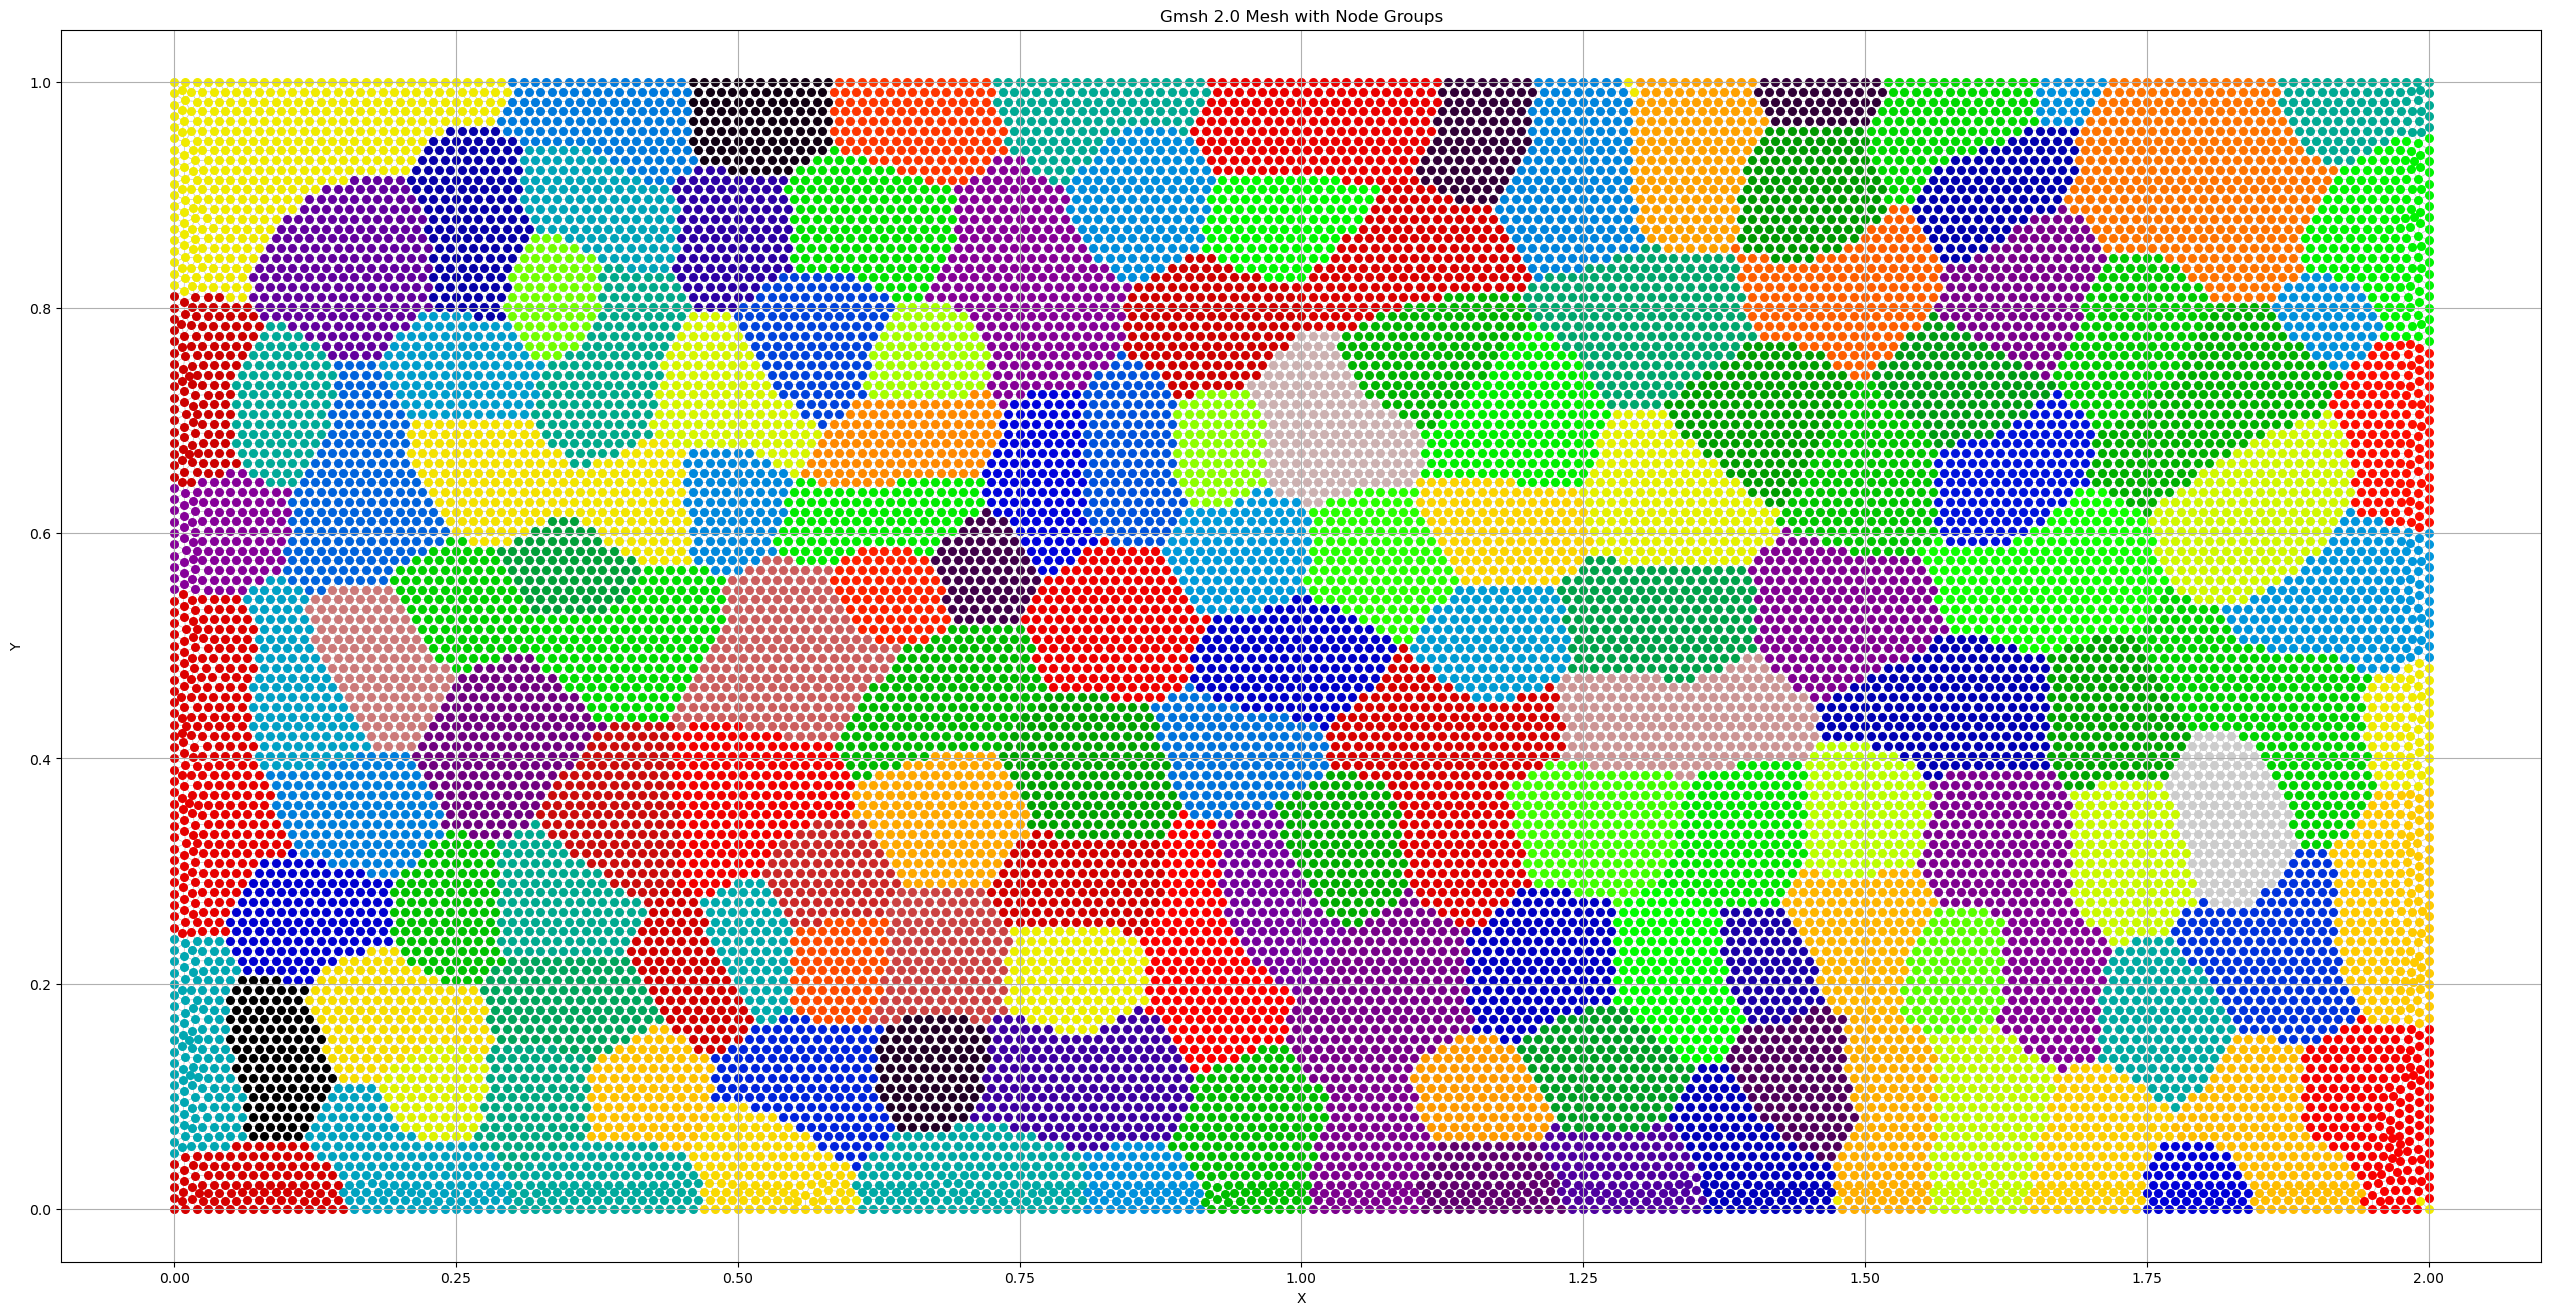

In [1]:
import meshio
import matplotlib.pyplot as plt
import numpy as np

# 读取 .msh 文件
mesh = meshio.read("rect.msh")  # 替换为你的文件名

# 提取节点坐标和三角形元素
points = mesh.points
x = points[:, 0]  # x 坐标
y = points[:, 1]  # y 坐标
triangles = mesh.cells_dict.get("triangle", None)
if triangles is None:
    raise ValueError("文件中没有三角形元素，请检查网格类型")

# 读取分组文件
group_file = "build/src/graph/clustering.txt"  # 替换为你的分组文件名
groups = []
with open(group_file, "r") as f:
    for line in f:
        groups.append(int(line.strip()))  # 假设每行是一个整数

# 检查节点数量是否匹配
if len(groups) != len(points):
    raise ValueError(f"分组文件中的节点数 ({len(groups)}) 与 .msh 文件中的节点数 ({len(points)}) 不匹配")

# 可视化
plt.figure(figsize=(32, 16))

# 绘制网格
plt.triplot(x, y, triangles, color='gray', linewidth=0.5, alpha=0.5)

# 按组别绘制节点，使用不同颜色
unique_groups = np.unique(groups)  # 获取所有唯一的组别
colors = plt.cm.get_cmap('nipy_spectral', len(unique_groups))  # 使用 tab10 颜色方案
for i, group in enumerate(unique_groups):
    mask = np.array(groups) == group  # 选择属于当前组的节点
    plt.scatter(x[mask], y[mask], c=[colors(i)], label=f"Group {group}", s=30)

# 添加图例和装饰
plt.title("Gmsh 2.0 Mesh with Node Groups")
plt.xlabel("X")
plt.ylabel("Y")
# plt.legend()
plt.axis('equal')  # 保持纵横比一致
plt.grid(True)
plt.show()

In [6]:
import os
print(os.path.exists("data/rect"))

True
